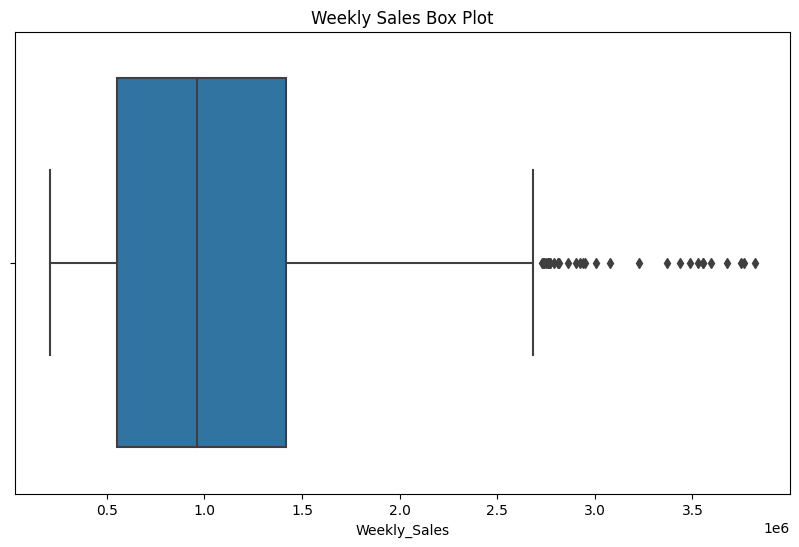

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('walmart.csv')

# 1. Data Preprocessing and EDA
missing_values = df.isnull().sum()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Weekly_Sales'])
plt.title('Weekly Sales Box Plot')
plt.show()

In [ ]:
# a. Unemployment Rate vs. Weekly Sales
correlation = df[['Unemployment', 'Weekly_Sales']].corr()
print(correlation)

              Unemployment  Weekly_Sales
Unemployment      1.000000     -0.106176
Weekly_Sales     -0.106176      1.000000


<ipython-input-13-f0847c3c6af6>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


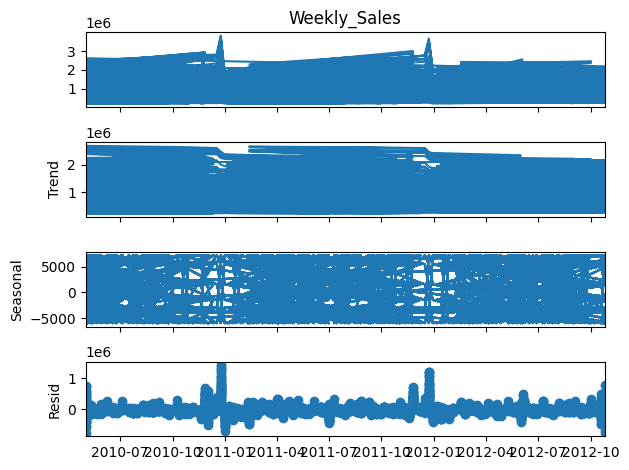

In [ ]:
# b. Seasonal Trend Analysis
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
decomposition = seasonal_decompose(df['Weekly_Sales'], model='additive', period=7)
decomposition.plot()
plt.show()

In [ ]:
# c. Temperature vs. Weekly Sales
correlation_temp = df[['Temperature', 'Weekly_Sales']].corr()
print(correlation_temp)

              Temperature  Weekly_Sales
Temperature       1.00000      -0.06381
Weekly_Sales     -0.06381       1.00000


In [ ]:
# d. Consumer Price Index vs. Weekly Sales
correlation_cpi = df[['CPI', 'Weekly_Sales']].corr()
print(correlation_cpi)

                   CPI  Weekly_Sales
CPI           1.000000     -0.072634
Weekly_Sales -0.072634      1.000000


In [ ]:
# e. Top Performing Stores
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
print(top_stores)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
Name: Weekly_Sales, dtype: float64


In [ ]:
# f. Worst Performing Store and the difference between highest and lowest perfoming stores
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
worst_store = store_sales.loc[store_sales['Weekly_Sales'].idxmin()]
print("Worst Performing Store:", int(worst_store['Store']))
highest_sales = store_sales['Weekly_Sales'].max()
lowest_sales = store_sales['Weekly_Sales'].min()
difference = highest_sales - lowest_sales

print("Difference between Highest and Lowest Performing Stores:", difference)

Worst Performing Store: 33
Difference between Highest and Lowest Performing Stores: 264237570.49999997


In [ ]:
# 2. Predictive Modeling for Sales Forecasting

# Data Preparation
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Week'] = df.index.week
df['Day'] = df.index.day

# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Feature Selection
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'Day']
target = 'Weekly_Sales'

# Model Training
model = ARIMA(train[target], order=(1, 1, 1))  # Example ARIMA model order
model_fit = model.fit()

# Model Evaluation
predictions = model_fit.forecast(steps=len(test))
mae = mean_absolute_error(test[target], predictions)
mse = mean_squared_error(test[target], predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

# Sales Forecasting for the next 12 weeks
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
print("Sales Forecast for the next 12 weeks:", forecast)

<ipython-input-22-d5e74558da3c>:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['Week'] = df.index.week
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored w

Mean Absolute Error: 481633.9783821245
Root Mean Squared Error: 618833.2231984708
Sales Forecast for the next 12 weeks: 5148    279336.047952
5149    281063.515662
5150    281499.371145
5151    281609.341363
5152    281637.087828
5153    281644.088509
5154    281645.854842
5155    281646.300504
5156    281646.412949
5157    281646.441319
5158    281646.448478
5159    281646.450284
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
